<a href="https://colab.research.google.com/github/srahman011/cybersecurity-/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Product Review Classification for E-commerce
---



In [ ]:
from datasets import load_dataset

ds = load_dataset("m-ric/amazon_product_reviews_datafiniti")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-02c2eb995e9506(…):   0%|          | 0.00/526k [00:00<?, ?B/s]

data/test-00000-of-00001-6c0cd69b1acf877(…):   0%|          | 0.00/179k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print("Dataset structure:\n", ds)
print("\nFeatures of the training split:\n", ds['train'].features)
print("\nFirst 5 rows of the training split:\n", ds['train'][:5])

Dataset structure:
 DatasetDict({
    train: Dataset({
        features: ['brand', 'primaryCategories', 'reviews.numHelpful', 'reviews.rating', 'reviews.text'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['brand', 'primaryCategories', 'reviews.numHelpful', 'reviews.rating', 'reviews.text'],
        num_rows: 2000
    })
})

Features of the training split:
 {'brand': ClassLabel(names=['Amazon', 'AmazonBasics', 'Amazonbasics']), 'primaryCategories': Value('string'), 'reviews.numHelpful': Value('float64'), 'reviews.rating': Value('int64'), 'reviews.text': Value('string')}

First 5 rows of the training split:
 {'brand': [2, 2, 0, 0, 0], 'primaryCategories': ['Health & Beauty', 'Health & Beauty', 'Electronics', 'Electronics', 'Electronics'], 'reviews.numHelpful': [None, None, 0.0, 0.0, 0.0], 'reviews.rating': [5, 5, 4, 4, 4], 'reviews.text': ["Amazon's batteries are great. I've had no problems with them leaking or corroding. They last as long as any other AA battery

Missing values

In [ ]:
import pandas as pd

# Convert the 'train' split to a pandas DataFrame
df_train = ds['train'].to_pandas()

# Calculate the number of missing values for each column
missing_values_count = df_train.isnull().sum()

# Calculate the percentage of missing values for each column
total_rows = len(df_train)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame to display the missing values information
missing_info = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})

# Filter to show only columns with missing values (optional, but good for clarity)
missing_info = missing_info[missing_info['Missing Count'] > 0]

print("Missing Values Information (Count and Percentage):\n", missing_info)

Missing Values Information (Count and Percentage):
                     Missing Count  Missing Percentage
reviews.numHelpful           3356           55.933333


In [ ]:
df_train['reviews.numHelpful'] = df_train['reviews.numHelpful'].fillna(0)

print("Missing values in 'reviews.numHelpful' after imputation:", df_train['reviews.numHelpful'].isnull().sum())

Missing values in 'reviews.numHelpful' after imputation: 0


In [ ]:
print("DataFrame Info:")
df_train.info()

print("\nDataFrame dtypes:")
print(df_train.dtypes)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               6000 non-null   int64  
 1   primaryCategories   6000 non-null   object 
 2   reviews.numHelpful  6000 non-null   float64
 3   reviews.rating      6000 non-null   int64  
 4   reviews.text        6000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 234.5+ KB

DataFrame dtypes:
brand                   int64
primaryCategories      object
reviews.numHelpful    float64
reviews.rating          int64
reviews.text           object
dtype: object


In [ ]:
print("Descriptive statistics for 'reviews.numHelpful':\n", df_train['reviews.numHelpful'].describe())

print("\nUnique values and counts for 'brand':\n", df_train['brand'].value_counts())

print("\nUnique values and counts for 'primaryCategories':\n", df_train['primaryCategories'].value_counts())

print("\nUnique values and counts for 'reviews.rating':\n", df_train['reviews.rating'].value_counts())

Descriptive statistics for 'reviews.numHelpful':
 count    6000.000000
mean        0.236167
std         4.969055
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       345.000000
Name: reviews.numHelpful, dtype: float64

Unique values and counts for 'brand':
 brand
2    3351
0    2646
1       3
Name: count, dtype: int64

Unique values and counts for 'primaryCategories':
 primaryCategories
Health & Beauty                3333
Electronics                    2288
Toys & Games,Electronics        284
Office Supplies,Electronics      68
Electronics,Media                27
Name: count, dtype: int64

Unique values and counts for 'reviews.rating':
 reviews.rating
4    2786
5    1779
3     627
1     502
2     306
Name: count, dtype: int64


In [ ]:
category_counts = df_train['primaryCategories'].value_counts()
unique_categories = list(category_counts.keys())

# Create a new column for each unique category, indicating its presence
for category in unique_categories:
    df_train[category] = df_train['primaryCategories'].apply(lambda x: 1 if category in x else 0)

print("First 5 rows with new category columns:")
print(df_train[['primaryCategories'] + unique_categories].head())

First 5 rows with new category columns:
  primaryCategories  Health & Beauty  Electronics  Toys & Games,Electronics  \
0   Health & Beauty                1            0                         0   
1   Health & Beauty                1            0                         0   
2       Electronics                0            1                         0   
3       Electronics                0            1                         0   
4       Electronics                0            1                         0   

   Office Supplies,Electronics  Electronics,Media  
0                            0                  0  
1                            0                  0  
2                            0                  0  
3                            0                  0  
4                            0                  0  


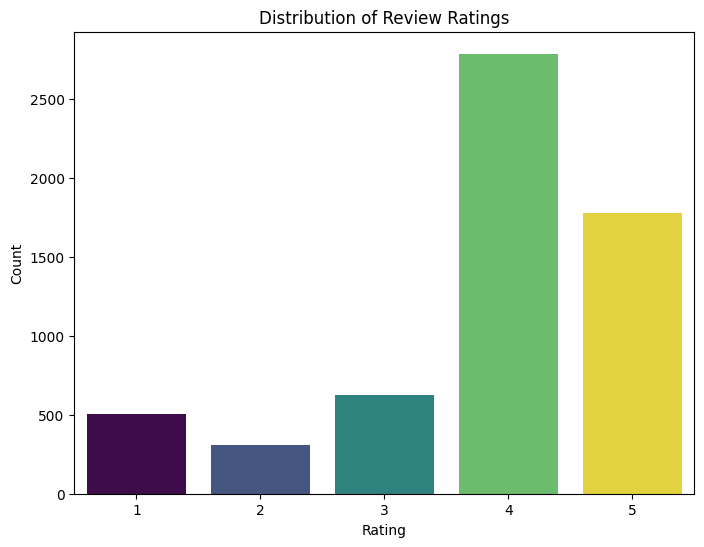

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='reviews.rating', data=df_train, palette='viridis', hue='reviews.rating', legend=False)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

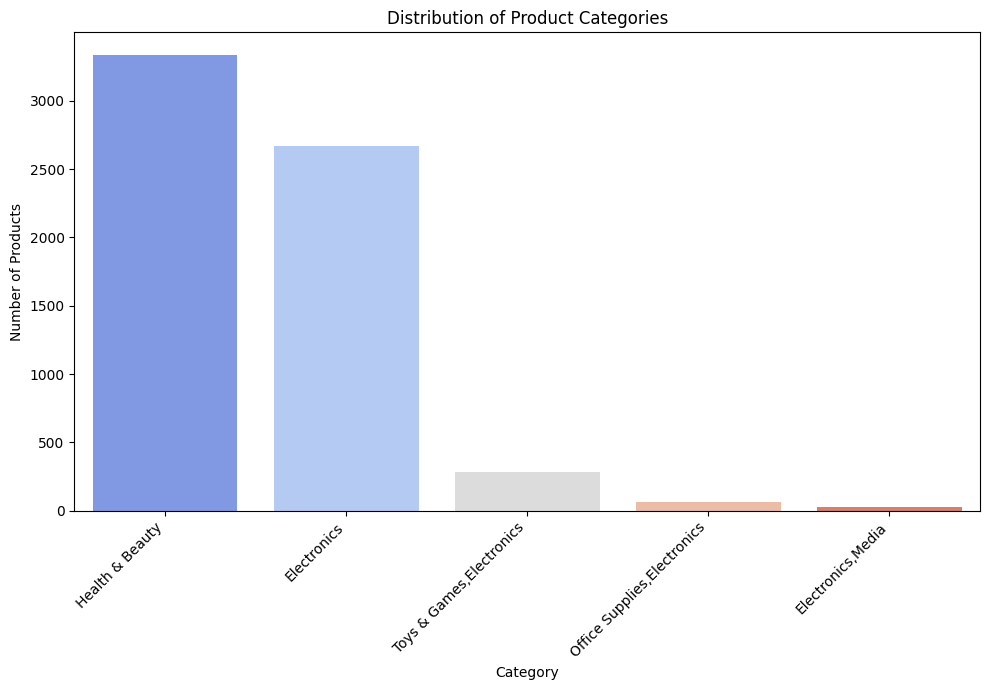

In [ ]:
category_counts_df = df_train[unique_categories].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=category_counts_df.index, y=category_counts_df.values, palette='coolwarm', hue=category_counts_df.index, legend=False)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

print("Pre-trained multilingual sentiment analysis model loaded successfully.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Pre-trained multilingual sentiment analysis model loaded successfully.


In [ ]:
from datasets import load_dataset

ds = load_dataset("m-ric/amazon_product_reviews_datafiniti")

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-02c2eb995e9506(…):   0%|          | 0.00/526k [00:00<?, ?B/s]

data/test-00000-of-00001-6c0cd69b1acf877(…):   0%|          | 0.00/179k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
import re

def clean_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with single space and strip whitespace
    return text

def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'
    return None

# Re-apply text cleaning and sentiment mapping to the ds object to ensure 'cleaned_text' and 'sentiment' exist
for split in ds.keys():
    ds[split] = ds[split].map(lambda x: {'cleaned_text': clean_text(x['reviews.text'])})
    ds[split] = ds[split].map(lambda x: {'sentiment': map_rating_to_sentiment(x['reviews.rating'])})

# Recreate df_train from the updated ds['train'] to include 'cleaned_text' and 'sentiment'
df_train = ds['train'].to_pandas()

batch_size = 32 # Adjust batch size based on available memory
predicted_sentiments = []

# Process texts in batches
for i in range(0, len(df_train), batch_size):
    batch_texts = df_train['cleaned_text'][i:i+batch_size].tolist()
    if not batch_texts: # Skip empty batches
        continue
    # Ensure texts are strings, handling potential None or non-string values
    batch_texts = [str(text) if text is not None else '' for text in batch_texts]

    predictions = sentiment_analyzer(batch_texts, truncation=True)
    predicted_sentiments.extend([pred['label'] for pred in predictions])

# Map the model's star ratings to our sentiment labels
def map_model_output_to_sentiment(label):
    if label in ['1 star', '2 stars']:
        return 'negative'
    elif label == '3 stars':
        return 'neutral'
    elif label in ['4 stars', '5 stars']:
        return 'positive'
    return None

df_train['predicted_sentiment'] = [map_model_output_to_sentiment(label) for label in predicted_sentiments]

print("Sentiment predictions generated and mapped to 'predicted_sentiment' column.")
print("First 5 predicted sentiments:")
print(df_train['predicted_sentiment'].head())

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Sentiment predictions generated and mapped to 'predicted_sentiment' column.
First 5 predicted sentiments:
0    positive
1    positive
2    positive
3    positive
4    positive
Name: predicted_sentiment, dtype: object


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Ensure both columns are not null for evaluation
df_eval_actual = df_train[df_train['sentiment'].notna() & df_train['predicted_sentiment'].notna()]

# Calculate Accuracy Score
accuracy_actual = accuracy_score(df_eval_actual['sentiment'], df_eval_actual['predicted_sentiment'])

# Calculate F1-score (weighted to account for class imbalance)
f1_actual = f1_score(df_eval_actual['sentiment'], df_eval_actual['predicted_sentiment'], average='weighted')

print(f"Actual Model Accuracy: {accuracy_actual:.4f}")
print(f"Actual Model F1-score (weighted): {f1_actual:.4f}")

Actual Model Accuracy: 0.8133
Actual Model F1-score (weighted): 0.8255


Actual Confusion Matrix:
[[3917  475  173]
 [ 170  282  175]
 [  42   85  681]]


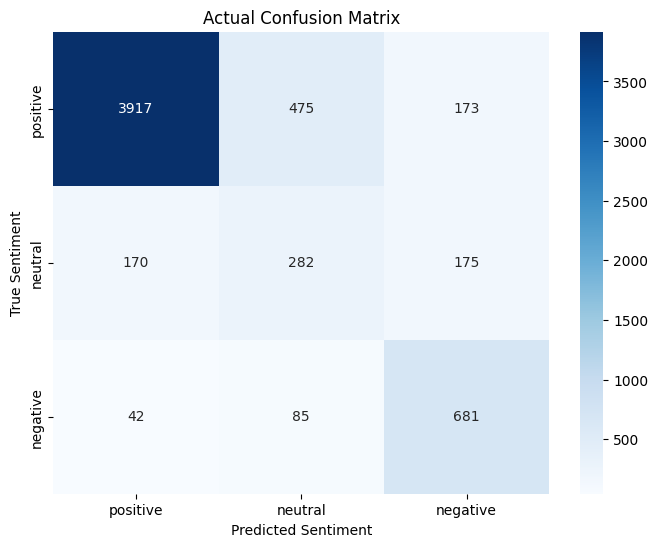

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the unique sentiment labels for consistent ordering
labels = ['positive', 'neutral', 'negative']

# Generate the confusion matrix
cm_actual = confusion_matrix(df_eval_actual['sentiment'], df_eval_actual['predicted_sentiment'], labels=labels)

print("Actual Confusion Matrix:")
print(cm_actual)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_actual, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Actual Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()



### Data Analysis Key Findings
*   The pre-trained sentiment analysis model successfully generated predictions after resolving initial dependency and long sequence handling issues.
*   The model achieved an accuracy of **0.8133** on the `df_train` dataset.
*   The weighted F1-score for the model was **0.8255**, indicating good overall performance across sentiment classes.
*   The confusion matrix revealed the following:
    *   **3917** positive reviews were correctly classified as positive.
    *   **282** neutral reviews were correctly classified as neutral.
    *   **681** negative reviews were correctly classified as negative.
*   Significant misclassifications occurred, particularly with positive reviews being misclassified as neutral (475 instances) or negative (173 instances).
*   Neutral reviews showed substantial misclassification, with 170 instances predicted as positive and 175 instances predicted as negative, suggesting the model struggles to distinguish neutral sentiment from positive or negative.

### Insights or Next Steps
*   Further investigation into the misclassified neutral reviews could reveal patterns or specific linguistic cues that the model struggles to interpret, potentially informing fine-tuning strategies or feature engineering.
*   Analyzing the examples where positive sentiment was misclassified as neutral or negative could help refine the sentiment mapping rules or improve the model's ability to discern nuanced positive expressions.
